In [49]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

a)

In [91]:
df = pd.read_excel("breast-cancer-wisconsin.xlsx")
df.head()

,code,thickness,uniCelS,uniCelShape,marAdh,epiCelSize,bareNuc,blaChroma,normNuc,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [92]:
df.isna().any()

code           False
thickness      False
uniCelS        False
uniCelShape    False
marAdh         False
epiCelSize     False
bareNuc         True
blaChroma      False
normNuc        False
mitoses        False
class          False
dtype: bool

The only column with nan values is 'bareNuc' therefore we only need to deal with this attribute. We replace the nan values by the mode since the attributes only contain disrete values and mean or median would potentially result in continuous values. Replacing by the most common value (mode) seems reasonable in this context in order not to skew the distribution.

In [93]:
df['bareNuc'] = df['bareNuc'].fillna(df['bareNuc'].mode()[0])
df.isna().any()

code           False
thickness      False
uniCelS        False
uniCelShape    False
marAdh         False
epiCelSize     False
bareNuc        False
blaChroma      False
normNuc        False
mitoses        False
class          False
dtype: bool

b)

In [102]:
pca = PCA()
df_pca = pca.fit_transform(df.drop(columns=["code", "class"]))

In [95]:
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

[0.68900383 0.07337931 0.0608315  0.04401949 0.03882427 0.03470382
 0.02521848 0.0226243  0.01139499]
[0.68900383 0.76238314 0.82321464 0.86723413 0.9060584  0.94076223
 0.96598071 0.98860501 1.        ]


We need 5 components to cover over 90 percent of the variance.

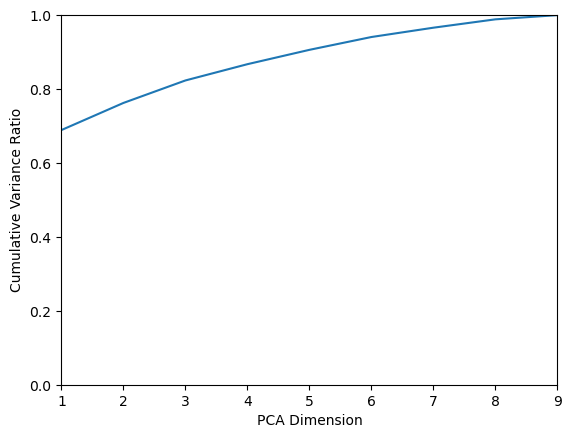

In [96]:
sns.lineplot(x=np.linspace(1, 9, 9, dtype=np.uint8), y=np.cumsum(pca.explained_variance_ratio_))
plt.xlim(1, 9)
plt.ylim(0, 1)
plt.xlabel("PCA Dimension")
plt.ylabel("Cumulative Variance Ratio")
plt.show()

c)

In [103]:
df_pca = np.hstack((df_pca[:, :5], df['class'].to_numpy()[:, None]))
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'class'])

In [104]:
df_pca['class'] = df_pca['class'].apply(lambda x: 'benign' if x == 2 else ('malignant' if x == 4 else 'nan'))

In [114]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,class
0,-4.418342,-0.032549,1.732736,-0.109784,0.834715,benign
1,4.861916,4.869842,-1.035612,-0.642934,-1.061164,benign
2,-4.575277,0.629610,-0.049151,0.328038,-0.149807,benign
3,5.165415,-3.406013,2.184542,1.631945,-3.283522,benign
4,-4.053561,0.105016,-0.081709,-0.841327,1.694524,benign


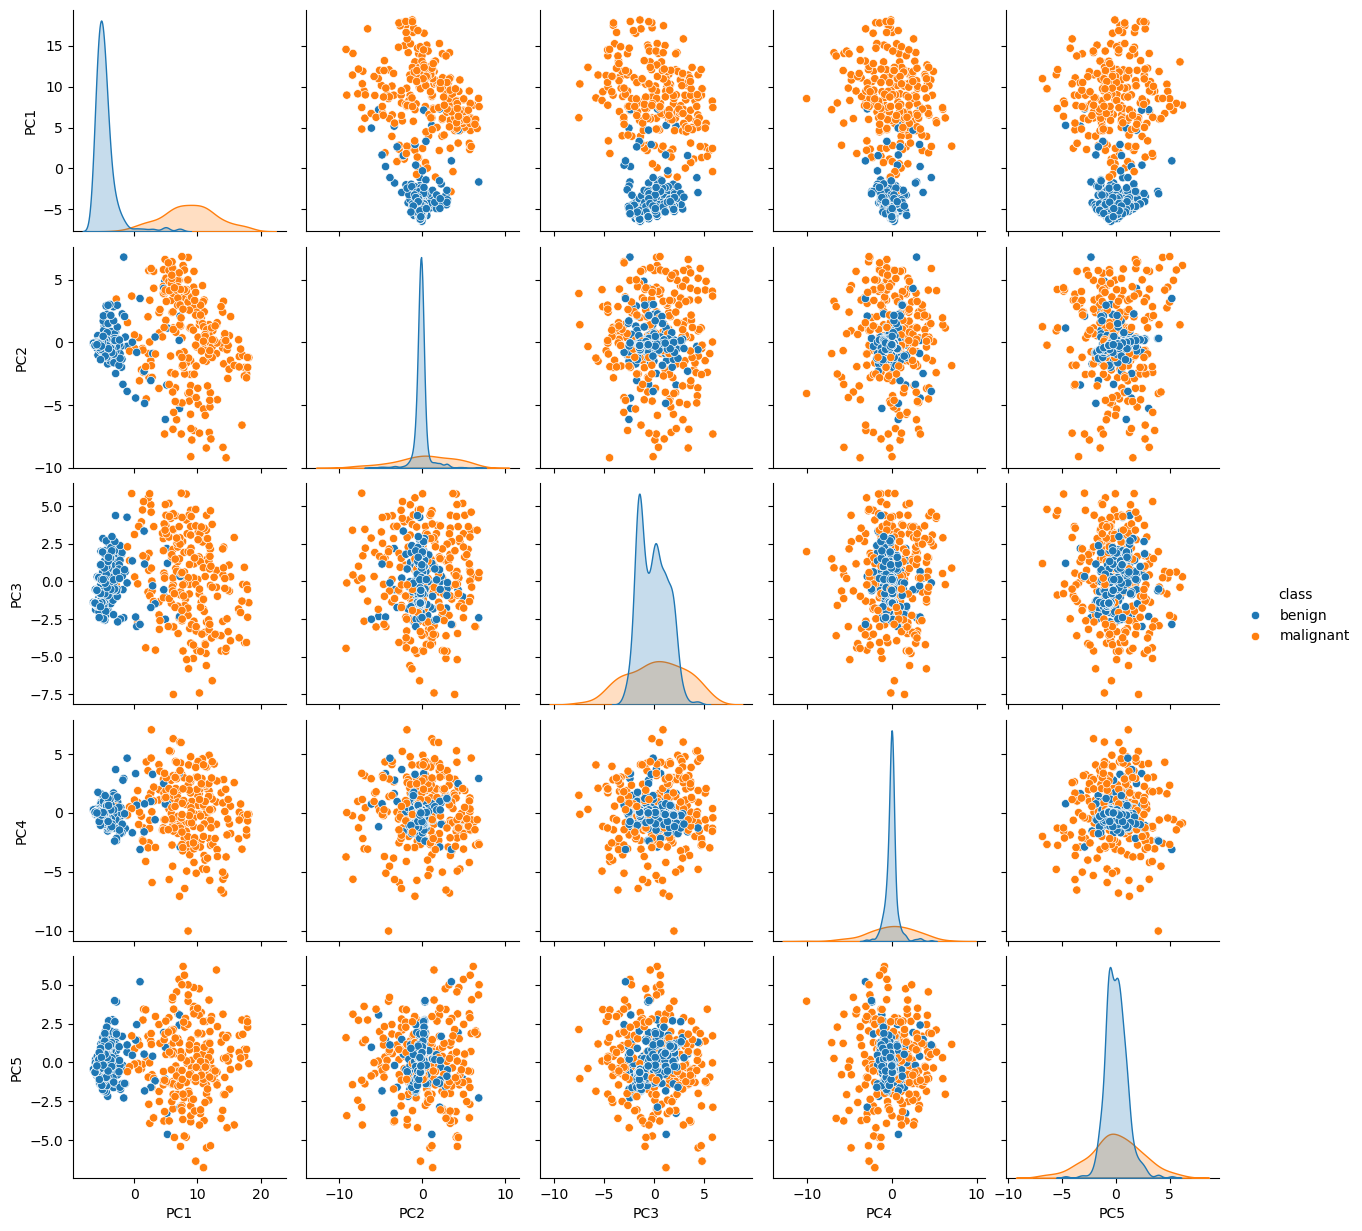

In [106]:
sns.pairplot(df_pca, hue="class")

d)

In this case the first principal component not only explains the most variance but also shows the strongest difference between the benign and malignant samples.

In [113]:
pca.components_[0]

array([0.2983261 , 0.40439054, 0.39224516, 0.33155363, 0.25000985,
       0.43971674, 0.29212756, 0.35663675, 0.12370014])

The original variables that have the highest weights in the definition of the first principal component are the second (uniCelS) and sixth (bareNuc). On the other hand the fifth (epiCellSize) and ninth (mitoses) variables have the lowest weights.

e)

In the case where the attributes have very different ranges the attributes with large numerical ranges will dominate since for them it is 'easier' to explain a lot of variance. Here it would definitely make sense to pre-process the data to a common scale in order for variances along the attributes to be comparable. This can be done by standardization which involves subtracting the mean from each point before dividing by the standard deviation.